There is an infleciton point in trip duration, 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import sklearn
import math

In [2]:
import re
import os
from datetime import datetime

In [3]:
starting_year = 2018
ending_year = 2020

In [4]:
fgb_ft = "../tripdata/{}{}-fordgobike-tripdata.csv"
baywheels_ft = "../tripdata/{}{}-baywheels-tripdata.csv"
is_fgb = lambda yr, mt: yr == 2018 or (yr == 2019 and mt <= 4)

In [5]:
datetime_transform = lambda x: (datetime.strptime(x.split(".")[0], "%Y-%m-%d %H:%M:%S")) if type(x) == str else x

In [6]:
def baywheels_assimilation(baywheels_df):
    # fix column names for baywheels data
    rn_df = baywheels_df.rename({
            "started_at": "start_time",
            "ended_at": "end_time",
            "start_lat": "start_station_latitude",
            "start_lng": "start_station_longitude",
            "end_lat":   "end_station_latitude",
            "end_lng":   "end_station_longitude"
        }, axis=1)
    rn_df["start_time"] = rn_df["start_time"].apply(datetime_transform)
    rn_df["end_time"] = rn_df["end_time"].apply(datetime_transform)
    rn_df["duration_sec"] = (rn_df["end_time"] - rn_df["start_time"]).apply(lambda x: x.seconds)
    return rn_df

def fgb_assimilation(fgb_df):
    fgb_df["start_time"] = fgb_df["start_time"].apply(datetime_transform)
    fgb_df["end_time"] = fgb_df["end_time"].apply(datetime_transform)
    return fgb_df

def data_cleanse(total_df):
    # remove outliers w/r/t duration_sec
    #   Use three-sigma rule for outlier removal
    mean_duration = rn_df["duration_sec"].mean()
    std_duration = rn_df["duration_sec"].
    pass

def get_aggregate_df():
    full_df = pd.DataFrame()
    
    def append_to_df(yr, mt, full_df):
        mt_str = ("0" if mt < 10 else "") + str(mt)
        mt_df = pd.DataFrame()
        if is_fgb(yr, mt):
            mt_df = pd.read_csv(fgb_ft.format(yr, mt_str))
            mt_df = fgb_assimilation(mt_df)
        else:
            mt_df = pd.read_csv(baywheels_ft.format(yr, mt_str))
            mt_df = baywheels_assimilation(mt_df)
        mt_df["Year"] = yr
        mt_df["Month"] = mt
        full_df = pd.concat([full_df, mt_df])
        return full_df

    for yr in range(starting_year, ending_year+1):
        for mt in range(1, 12):
            full_df = append_to_df(yr, mt, full_df)
    return data_cleanse(full_df.reset_index(drop=True))

In [7]:
agg_df = get_aggregate_df()

/tmp/ipykernel_22148/1602006240.py:31: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mt_df = pd.read_csv(baywheels_ft.format(yr, mt_str))
/tmp/ipykernel_22148/1602006240.py:31: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  mt_df = pd.read_csv(baywheels_ft.format(yr, mt_str))
/tmp/ipykernel_22148/1602006240.py:31: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mt_df = pd.read_csv(baywheels_ft.format(yr, mt_str))
/tmp/ipykernel_22148/1602006240.py:31: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  mt_df = pd.read_csv(baywheels_ft.format(yr, mt_str))
/tmp/ipykernel_22148/1602006240.py:31: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  mt_df = pd.read_csv(baywheels_ft.format(yr, mt_str))


In [8]:
agg_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,Year,Month,rental_access_method,ride_id,rideable_type,member_casual
0,75284,2018-01-31 22:52:35,2018-02-01 19:47:19,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765.0,Subscriber,No,2018,1,NaN,NaN,NaN,NaN
1,85422,2018-01-31 16:13:34,2018-02-01 15:57:17,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815.0,Customer,No,2018,1,NaN,NaN,NaN,NaN
2,71576,2018-01-31 14:23:55,2018-02-01 10:16:52,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039.0,Customer,No,2018,1,NaN,NaN,NaN,NaN
3,61076,2018-01-31 14:53:23,2018-02-01 07:51:20,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321.0,Customer,No,2018,1,NaN,NaN,NaN,NaN
4,39966,2018-01-31 19:52:24,2018-02-01 06:58:31,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617.0,Subscriber,No,2018,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128439,521,2020-11-18 15:50:42,2020-11-18 15:59:23,SF-G27,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,SF-J26,Victoria Manalo Draves Park,37.777791,-122.406432,NaN,NaN,NaN,2020,11,NaN,269D5BFA09DD0931,classic_bike,member
6128440,320,2020-11-14 15:24:42,2020-11-14 15:30:02,SF-G27,Powell St BART Station (Market St at 4th St),37.786286,-122.405430,SF-J26,Victoria Manalo Draves Park,37.777872,-122.406261,NaN,NaN,NaN,2020,11,NaN,278F02FC635890AC,electric_bike,member
6128441,907,2020-11-20 17:47:08,2020-11-20 18:02:15,SF-M28,Hubbell St at 16th St,37.766594,-122.398198,SF-J26,Victoria Manalo Draves Park,37.777791,-122.406432,NaN,NaN,NaN,2020,11,NaN,930A485FE53F3F45,docked_bike,casual
6128442,840,2020-11-12 17:28:24,2020-11-12 17:42:24,SF-B28,Cruise Terminal at Pier 27,37.804626,-122.401971,SF-J26,Victoria Manalo Draves Park,37.777834,-122.406190,NaN,NaN,NaN,2020,11,NaN,28F384249871A053,electric_bike,member


(array([ 428209., 1343644., 1322295.,  979585.,  653259.,  417367.,
         263689.,  173031.,  121050.,   78801.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

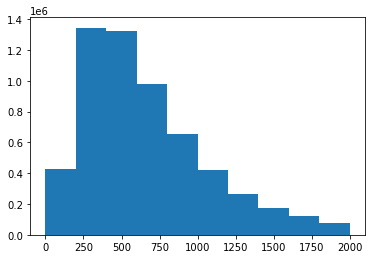

In [9]:
plt.hist(agg_df[agg_df["duration_sec"] <= 2000]["duration_sec"])

In [10]:
station_trip_means = agg_df.groupby(["start_station_id","end_station_id"])["duration_sec"].mean().reset_index().rename({"duration_sec": "mean_trip_duration"},axis=1)

In [11]:
mean_agg_df = agg_df.merge(station_trip_means, on=["start_station_id", "end_station_id"], how="left")

In [12]:
mean_agg_df["trip ratio"] = mean_agg_df["duration_sec"]/mean_agg_df["mean_trip_duration"]

(array([ 54404.,  63289.,  96534., 156189., 249088., 385875., 557034.,
        705806., 741121., 634681., 448502., 251448., 148491.,  92755.,
         62432.,  44964.,  34369.,  26649.,  21583.,  17963.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

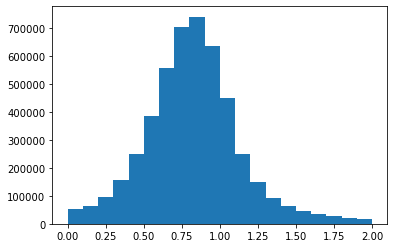

In [13]:
plt.hist(mean_agg_df[mean_agg_df["trip ratio"] <= 2.0]["trip ratio"], bins=20)

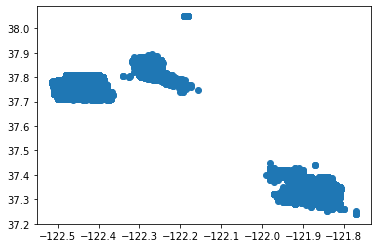

In [14]:
agg_sf = agg_df[agg_df["start_station_latitude"].apply(lambda x: x >=37 and x <=39) & agg_df["start_station_longitude"].apply(lambda x: x >=-125 and x <=-115) ]

plt.scatter(agg_sf["start_station_longitude"], agg_sf["start_station_latitude"])

In [15]:
# [longitude_range, latitude_range]
city_rectangles = {
    "Nashville": [[-90,-80],[35,37]],
    "NorthCal": [[-125,-115],[37,39]],
}

In [16]:
# within the bay area we have approx 3 distinct clusters:
#    San Francisco: [[-122.55,-122.35], [37.67,37.82]]
#    Oakland: [[-122.35, -122.12], [37.7, 37.92]]
#    San Jose: [[-122, -121.75], [37.2, 37.5]]

In [ ]:
bay_rectangles = {
    "San Francisco": [[-122.55,-122.35], [37.67,37.82]],
    "Oakland": [[-122.35, -122.12], [37.7, 37.92]],
    "San Jose": [[-122, -121.75], [37.2, 37.5]],
}

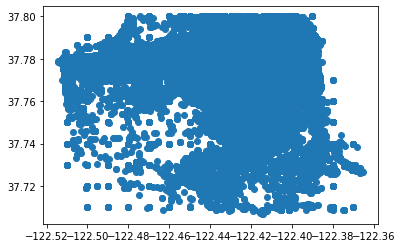

In [17]:
agg_sf = agg_df[agg_df["start_station_latitude"].apply(lambda x: x >=37.7 and x <=37.8) & agg_df["start_station_longitude"].apply(lambda x: x >=-122.55 and x <=-122.35) ]

plt.scatter(agg_sf["start_station_longitude"], agg_sf["start_station_latitude"])

(array([ 58888., 224067., 404230., 491829., 508252., 477978., 418891.,
        353330., 291907., 237099.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

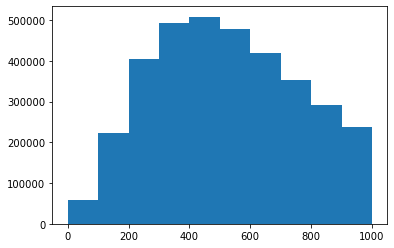

In [26]:
plt.hist(agg_sf[agg_sf["duration_sec"] <= 1000]["duration_sec"])

In [28]:
agg_sf[["start_station_longitude", "start_station_latitude", "end_station_longitude", "end_station_latitude"]].mode()

,start_station_longitude,start_station_latitude,end_station_longitude,end_station_latitude
0,-122.417385,37.776619,-122.395282,37.776598


In [32]:
class SourceDest:
    def __init__(self, st_long, st_lat, end_long, end_lat):
        self.st_long  = st_long
        self.st_lat   = st_lat
        self.end_long = end_long
        self.end_lat  = end_lat
    def df_filter(self, df):
        return df[(df["start_station_longitude"] == self.st_long) &
                  (df["start_station_latitude"] == self.st_lat) &
                  (df["end_station_longitude"] == self.st_long) &
                  (df["end_station_latitude"]  == self.st_lat)]

In [33]:
mode_sd = SourceDest(-122.417385, 37.776619, -122.395282, 37.776598)

In [105]:
mode_agg = mode_sd.df_filter(agg_sf)

(array([ 85.,  67., 137.,  73.,  61.,  40.,  26.,  22.,  21.,  16.]),
 array([  2. ,  31.7,  61.4,  91.1, 120.8, 150.5, 180.2, 209.9, 239.6,
        269.3, 299. ]),
 <BarContainer object of 10 artists>)

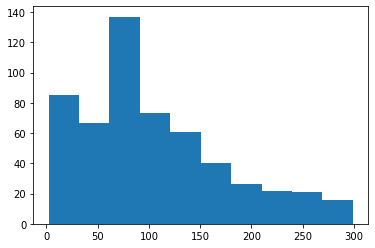

In [106]:
plt.hist(mode_agg[mode_agg["duration_sec"] < 300]["duration_sec"])

In [142]:
def get_erlang_params(duration_data):
    dur_mean = duration_data.mean()
    dur_std = duration_data.std()
    erlang_rate = dur_mean/(dur_std**2)
    erlang_k = round(dur_mean*erlang_rate)
    erlang_rate = float(erlang_k)/dur_mean
    #exp_rate = 1/dur_mean
    return [erlang_rate, erlang_k]

In [141]:
def erlang_cdf(x, erlang_params):
    erlang_rate = erlang_params[0]
    erlang_k = erlang_params[1]
    acc = 0.0
    for n in range(erlang_k):
        sterm  = (erlang_rate*x)**n
        sterm *= (math.e**(-1.0*erlang_rate*x))
        sterm /= (math.factorial(n))
        acc += sterm
    return 1-acc

def exp_cdf(x, exp_params):
    exp_rate = exp_params[0]
    return 1- (math.e**(-1.0*exp_rate*x))

In [151]:
filter_ma = mode_agg[(mode_agg["start_time"] >= datetime(2020,1,1)) & (mode_agg["duration_sec"] < 300)]

(array([83., 62., 36., 18., 21., 12.,  6.,  2.,  3.,  3.]),
 array([  2.,  31.,  60.,  89., 118., 147., 176., 205., 234., 263., 292.]),
 <BarContainer object of 10 artists>)

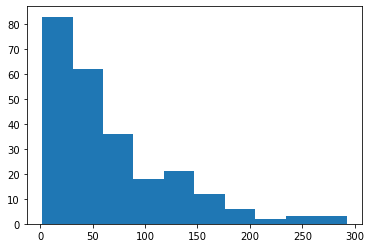

In [152]:
plt.hist(filter_ma["duration_sec"])

In [154]:
filter_params = get_erlang_params(filter_ma["duration_sec"])

In [155]:
erlang_cdf(50, filter_params)

0.5409876423807121

In [156]:
sps.kstest(filter_ma["duration_sec"], lambda x: exp_cdf(x, filter_params))

KstestResult(statistic=0.052264792115450986, pvalue=0.4959719896455598)

In [157]:
filter_params

[0.015573562927323372, 1]